In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from pathlib import Path
from sklearn.model_selection import train_test_split

In [103]:
#Data Preprocessing
data_path = Path(Path.cwd().parents[1]/'OneDrive'/'文档'/'GitHub'/'ArrestCaseDataPipeline'/'DCSC-Scraper')
df = pd.read_csv(str(data_path)+"\\fta_holdout.csv")
X = df.iloc[:,[5,7,8,14,15,16]]
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [104]:
#Train XGboost model
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=3,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
predictions = model.predict(X_test)
XGBA = accuracy_score(y_test, predictions)

In [108]:
#Result
print(model.get_params())
print("The Accuracy  is {}".format(XGBA))
p = precision_score(y_test, predictions, average='binary',pos_label=1)
r = recall_score(y_test, predictions, average='binary',pos_label=1)
f1score = f1_score(y_test, predictions, average='binary',pos_label=1)
print("precision: %s"% p)
print("recall: %s"% r)
print("f1score: %s"% f1score)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.7363636363636363
precision: 0.42424242424242425
recall: 0.2641509433962264
f1score: 0.3255813953488372


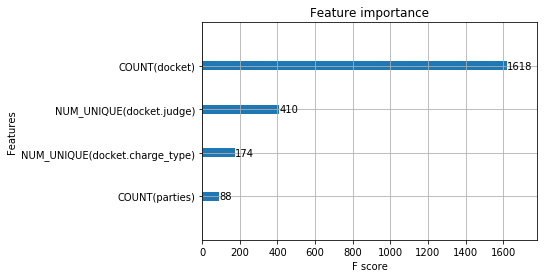

In [109]:
#Plot feature importance
xgb.plot_importance(final_m,max_num_features=10)
plt.show()

In [110]:
#plot tree diagram
import graphviz
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
ceate_feature_map(X_train.columns)

fig,ax = plt.subplots()
fig.set_size_inches(300,50)
xgb.plot_tree(final_m,ax = ax,fmap='xgb.fmap')